## Bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from pytrends.request import TrendReq
from matplotlib import style
import scipy.stats as sc

In [77]:
style.use('seaborn')

## Buscando os dados

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)

## Palavras-chave

In [4]:
lista = ['bitcoin']

## Buscando pesquisas no google

In [5]:
pytrends.build_payload(lista, cat=0, timeframe='2019-01-01 2021-10-07', geo='BR', gprop='')

In [6]:
bitcoin = pytrends.interest_over_time()
bitcoin.tail()

,bitcoin,isPartial
date,,
2021-09-05,45,False
2021-09-12,37,False
2021-09-19,43,False
2021-09-26,34,False
2021-10-03,45,False


In [7]:
bitcoin.index[0]

Timestamp('2019-01-06 00:00:00')

## Plotando gráfico

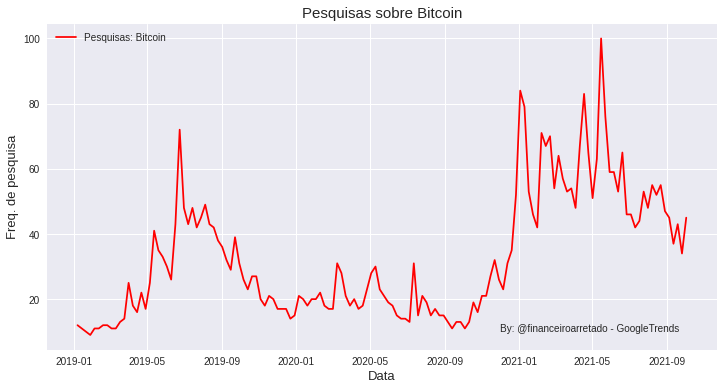

In [78]:
plt.figure(figsize=(12, 6));
plt.title('Pesquisas sobre Bitcoin', fontsize=15);
x, = plt.plot(bitcoin.bitcoin, color='red');
plt.xlabel('Data', fontsize=13);
plt.ylabel('Freq. de pesquisa', fontsize=13);
plt.text(np.datetime64('2020-12-01'), 10, 'By: @financeiroarretado - GoogleTrends', fontsize=10);
plt.legend([x], ['Pesquisas: Bitcoin'], fontsize=10, loc=2);

## Buscando cotação do bitcoin

In [9]:
btc = yf.download('BTC-USD', start='2019-01-06', end='2021-10-03')['Adj Close']
btc.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-01-06    4076.632568
2019-01-07    4025.248291
2019-01-08    4030.847900
2019-01-09    4035.296387
2019-01-10    3678.924561
Name: Adj Close, dtype: float64

## Plotando gráfico 

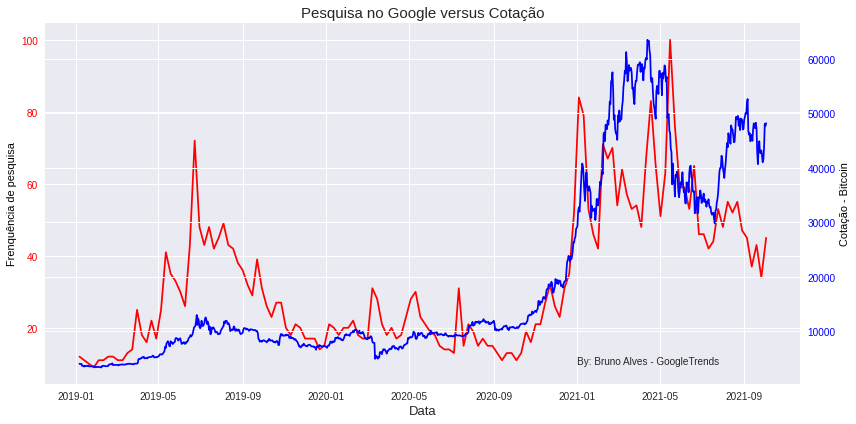

In [79]:
fig, ax1 = plt.subplots(figsize=(12, 6));

color = 'red';
ax1.set_xlabel('Data', fontsize=13);
ax1.set_ylabel('Frenquência de pesquisa', color='black');
ax1.plot(bitcoin.bitcoin, color=color);
ax1.tick_params(axis='y', labelcolor=color);
ax1.text(np.datetime64('2021-01-01'), 10, 'By: Bruno Alves - GoogleTrends');
ax1.set_title('Pesquisa no Google versus Cotação', fontsize=15);

ax2 = ax1.twinx()

color='blue';
ax2.set_ylabel('Cotação - Bitcoin', color='black');
ax2.plot(btc, color=color);
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

## Regressão linear

Trabalhando os dados do GoogleTrends

In [38]:
bitcoin_google = bitcoin.mean(axis=1)
bitcoin_google

date
2019-01-06    14.905093
2019-01-13    14.571759
2019-01-20    14.238426
2019-01-27    13.905093
2019-02-03    14.571759
                ...    
2021-09-05    25.905093
2021-09-12    23.238426
2021-09-19    25.238426
2021-09-26    22.238426
2021-10-03    25.905093
Length: 144, dtype: float64

In [39]:
bitcoin['média'] = bitcoin_google
bitcoin.head()

,bitcoin,isPartial,média
date,,,
2019-01-06,12,False,14.905093
2019-01-13,11,False,14.571759
2019-01-20,10,False,14.238426
2019-01-27,9,False,13.905093
2019-02-03,11,False,14.571759


In [40]:
print(len(bitcoin.bitcoin))

144


Trabalhando os daos da cotação do Bitcoin

In [28]:
btc_cotacao = btc.resample('w').mean()
btc_cotacao.head()

Date
2019-01-06    4076.632568
2019-01-13    3810.276681
2019-01-20    3665.388532
2019-01-27    3593.255755
2019-02-03    3476.508754
Freq: W-SUN, Name: Adj Close, dtype: float64

In [41]:
print(len(btc_cotacao))

144


Atribuindo valores para X e Y

In [63]:
data = pd.DataFrame()

data['Média da lista de palavras'] = bitcoin_google
data['Média da cotação BITCOIN'] = btc_cotacao

data.head()

,Média da lista de palavras,Média da cotação BITCOIN
date,,
2019-01-06,14.905093,4076.632568
2019-01-13,14.571759,3810.276681
2019-01-20,14.238426,3665.388532
2019-01-27,13.905093,3593.255755
2019-02-03,14.571759,3476.508754


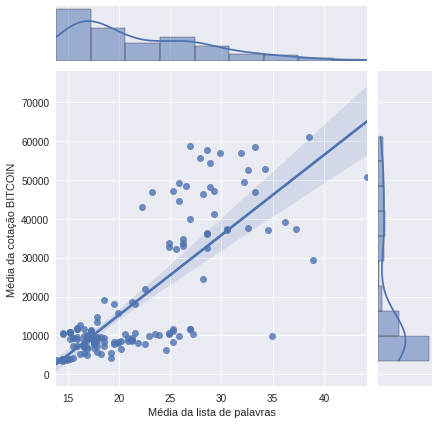

In [82]:
grafico = sns.jointplot(data=data, x='Média da lista de palavras', y='Média da cotação BITCOIN', kind='reg');
#grafico.annotate(sc.pearsonr);

SCRIP COMPLETO!